In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from scipy.spatial import distance

%matplotlib inline


- objects count not correlated with area (objects/background) [TODO]
- randomized placement
- no overlaps
- what else?
- random color for objects?


In [42]:


class GenerateImagesWithObjects:
    def __init__(self, 
                 obj_count_range=range(1, 100),
                 obj_size_range=(5, 15),
                 obj_distance_range=(5,20),
                 distribiuton='uniform',
                 image_shape=(400, 400, 3),
                 edge_dist=20,  
                 background='noise',
                 black_and_white=False
                ):
        
        self.obj_count_range = obj_count_range
        self.obj_size_range = obj_size_range
        self.obj_distance_range = obj_distance_range
        self.distribiuton = distribiuton
        self.image_shape = image_shape
        self.edge_dist = edge_dist
        self.background = background
        self.black_and_white = black_and_white
        self.color_shape = 3
        if self.black_and_white:
            self.image_shape=self.image_shape[:2]
            self.color_shape = 1
            
        
    @staticmethod    
    def _circles_are_overlapping(circle1, circle2):
        x0, y0, r0 = circle1
        x1, y1, r1 = circle2
        if circle1 == circle2:
            return True
        return abs(r0-r1)^2 <= ((x0-x1)^2 + (y0-y1)^2 <= (r0 + r1)^2)
    
    def _random_color(self):
        return np.random.randint(20, 220, size=(self.color_shape))


    def _circles_are_distant(self, circle1, circle2):  
        x0, y0, r0 = circle1
        x1, y1, r1 = circle2
        dst = distance.euclidean((x0,y0),(x1,y1)) - (r0 + r1)
        return dst>np.random.randint(*self.obj_distance_range)
    
    
    def _can_place_circle(self, circles_drawn, new_circle):
        return all([self._circles_are_distant(new_circle, c_on_canvas) for c_on_canvas in circles_drawn])
    
    
    

    def _get_random_circle(self):
        if self.distribiuton == 'uniform':
            x = np.random.randint(self.edge_dist, self.image_shape[0] - self.edge_dist)
            y = np.random.randint(self.edge_dist, self.image_shape[0] - self.edge_dist)
            r = np.random.randint(*self.obj_size_range) 
            
        return x,y,r
    
    
    def _get_canvas(self):    
        if self.background == 'noise':
            canvas = np.random.randint(1, 255, size=self.image_shape, dtype='uint8')
        elif self.background == 'white':
            canvas = np.zeros(self.image_shape[0], dtype='uint8')
        return canvas
    
                    
    def generate_image(self, nr_objects):
        canvas = self._get_canvas()

        circles_drawn = []
        while len(circles_drawn) < nr_objects:
            x,y,r = self._get_random_circle()
            random_color = self._random_color()
            if not self._can_place_circle(circles_drawn, (x,y,r)):
                continue
            else:
                cv2.circle(canvas, (x,y), r, random_color, -1)
                circles_drawn.append((x,y,r))
        return canvas
                
                

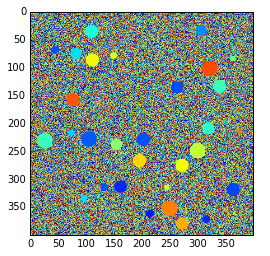

In [43]:
go = GenerateImagesWithObjects(black_and_white=True)
plt.imshow(go.generate_image(30)) 
    

In [44]:
go = GenerateImagesWithObjects()

In [20]:
plt.imshow(go.generate_image(30))

IndexError: tuple index out of range